<a href="https://colab.research.google.com/github/jcmachicao/gdmk_uc__reportes_edusights/blob/main/uc_edusights__post_captum_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Resultados de Captum

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [ ]:
path = '00 2025_all/2025 Proyectos/2025__Edusights_JCMV/archivos/edusights_reporte_20250115__jcmv/'
os.listdir('drive/My Drive/'+ path)

['uc_edusights__post_captum_clustering.ipynb',
 'captum_report_sample.png',
 'captum_report_sample.xlsx',
 'captum_result_20250220.xlsx']

In [ ]:
archivo = 'captum_result_20250220.xlsx'

In [ ]:
# 🔹 Cargar datos (reemplaza 'tu_archivo.xlsx' con el nombre real)
df = pd.read_excel('drive/My Drive/'+ path + archivo)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Tiempo_espera_Entre 31 a 60 días',
       'Tiempo_espera_Entre 61 a 90 días', 'Tiempo_espera_Menos de 30 días',
       'Tiempo_espera_Más de 91 días', 'TIPO_INGRESANTE_CONVALIDANTE',
       'TIPO_INGRESANTE_MOVILIDAD', 'TIPO_INGRESANTE_ORDINARIO',
       'APROBO_RV_NO', 'APROBO_RV_SI',
       ...
       'Ingre_familia_Entre S/ 2001 y S/ 4000',
       'Ingre_familia_Entre S/ 4001 y S/ 6000',
       'Ingre_familia_Menos de S/ 1025 soles', 'Ingre_familia_Más de S/ 6000',
       'Dispo_Internet_7 días por semana',
       'Dispo_Internet_De 1 o 2 días por semana',
       'Dispo_Internet_De 3 a 4 días por semana',
       'Dispo_Internet_De 5 a 6 días por semana', 'Puntaje_Admisión', 'Edad'],
      dtype='object', length=150)

In [ ]:
df.head()

,Unnamed: 0,Tiempo_espera_Entre 31 a 60 días,Tiempo_espera_Entre 61 a 90 días,Tiempo_espera_Menos de 30 días,Tiempo_espera_Más de 91 días,TIPO_INGRESANTE_CONVALIDANTE,TIPO_INGRESANTE_MOVILIDAD,TIPO_INGRESANTE_ORDINARIO,APROBO_RV_NO,APROBO_RV_SI,...,Ingre_familia_Entre S/ 2001 y S/ 4000,Ingre_familia_Entre S/ 4001 y S/ 6000,Ingre_familia_Menos de S/ 1025 soles,Ingre_familia_Más de S/ 6000,Dispo_Internet_7 días por semana,Dispo_Internet_De 1 o 2 días por semana,Dispo_Internet_De 3 a 4 días por semana,Dispo_Internet_De 5 a 6 días por semana,Puntaje_Admisión,Edad
0,73310488,0,0,0,0,0,0,0,0.000000,-0.000185,...,0.000000,0.0,0.000109,0.0,0.000081,0.000000,0.0,0.0,-0.006822,0.008733
1,42780843,0,0,0,0,0,0,0,0.000055,0.000000,...,-0.000249,0.0,0.000000,0.0,-0.000027,0.000000,0.0,0.0,0.002428,0.004661
2,75661214,0,0,0,0,0,0,0,0.000043,0.000000,...,0.000000,0.0,0.000000,0.0,-0.000030,0.000000,0.0,0.0,0.000057,0.005198
3,76167078,0,0,0,0,0,0,0,0.000000,0.000028,...,0.000000,0.0,0.000000,0.0,-0.000148,0.000000,0.0,0.0,-0.002699,0.005057
4,73477131,0,0,0,0,0,0,0,-0.000007,0.000000,...,0.000000,0.0,0.000329,0.0,0.000000,-0.000008,0.0,0.0,0.000472,0.003673


In [ ]:
df.index = df['Unnamed: 0']
df = df.drop(columns=['Unnamed: 0'])
df.columns

Index(['Tiempo_espera_Entre 31 a 60 días', 'Tiempo_espera_Entre 61 a 90 días',
       'Tiempo_espera_Menos de 30 días', 'Tiempo_espera_Más de 91 días',
       'TIPO_INGRESANTE_CONVALIDANTE', 'TIPO_INGRESANTE_MOVILIDAD',
       'TIPO_INGRESANTE_ORDINARIO', 'APROBO_RV_NO', 'APROBO_RV_SI',
       'APROBO_RM_NO',
       ...
       'Ingre_familia_Entre S/ 2001 y S/ 4000',
       'Ingre_familia_Entre S/ 4001 y S/ 6000',
       'Ingre_familia_Menos de S/ 1025 soles', 'Ingre_familia_Más de S/ 6000',
       'Dispo_Internet_7 días por semana',
       'Dispo_Internet_De 1 o 2 días por semana',
       'Dispo_Internet_De 3 a 4 días por semana',
       'Dispo_Internet_De 5 a 6 días por semana', 'Puntaje_Admisión', 'Edad'],
      dtype='object', length=149)


### La varianza explicada
En el contexto del Análisis de Componentes Principales (PCA),  representa la proporción de la variabilidad total de los datos original que es capturada por cada componente principal, o por un conjunto de componentes principales.  En otras palabras, te dice qué tan bien los nuevos componentes (las nuevas dimensiones creadas por PCA) resumen la información original.

**`pca.explained_variance_ratio_`**: Este atributo del objeto `pca` contiene un array con la proporción de varianza explicada por cada componente principal.  La suma de todos los elementos de este array es 1 (o muy cercano a 1 debido a la precisión numérica).

**`np.cumsum(pca.explained_variance_ratio_)`**: Esta línea calcula la *varianza explicada acumulada*.  Es decir, la suma acumulativa de las varianzas explicadas por cada componente.  Por ejemplo, el primer elemento de este array representa la varianza explicada por el primer componente principal, el segundo elemento representa la varianza explicada por los dos primeros componentes principales juntos, y así sucesivamente.

**Gráfica**: La gráfica muestra la varianza explicada acumulada en función del número de componentes principales.  El eje x representa el número de componentes, y el eje y representa el porcentaje de la varianza original que se explica con esos componentes.

**Interpretación de la gráfica:**

La gráfica te permite visualizar cuántos componentes principales necesitas para explicar una cantidad "suficiente" de la variabilidad en tus datos.  Normalmente, el "codo" (elbow point) de la curva es la referencia.  Representa un equilibrio entre la complejidad del modelo (menos componentes) y la preservación de la información (varianza explicada). Más componentes después del "codo" no mejoran la varianza explicada. Si 3 componentes principales explican 95% de la varianza total, es lo suficiente.

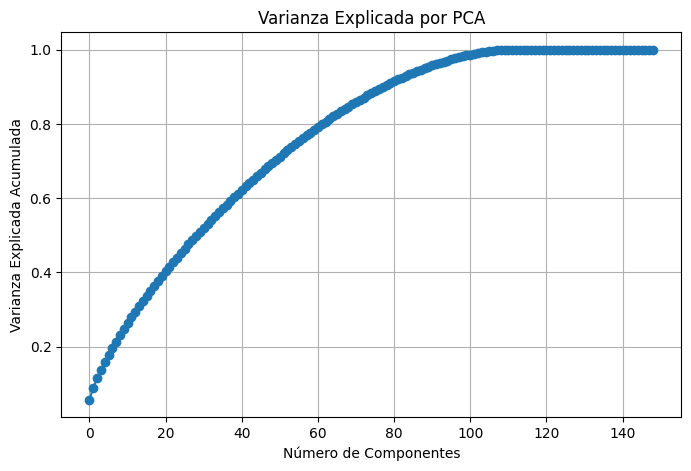

In [ ]:
# 🔹 Preprocesamiento: normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 🔹 Aplicar PCA sin reducir componentes (para explorar varianza)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 🔹 Graficar la varianza explicada para decidir cuántos componentes usar
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada por PCA")
plt.grid()
plt.show()

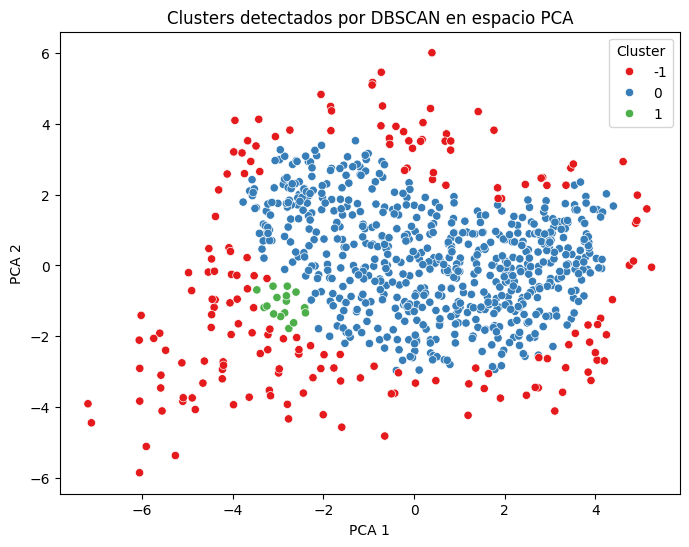

In [ ]:
# 🔹 Elegir 2 o 3 componentes según la varianza acumulada
pca = PCA(n_components=2)  # O usa 3D con n_components=3
X_pca = pca.fit_transform(X_scaled)

# 🔹 Aplicar DBSCAN en el espacio reducido
dbscan = DBSCAN(eps=0.5, min_samples=10)  # Ajusta eps y min_samples según necesidad
clusters = dbscan.fit_predict(X_pca)

# 🔹 Agregar clusters al dataframe original
df["Cluster"] = clusters

# 🔹 Graficar clusters encontrados en 2D
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set1", legend="full")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters detectados por DBSCAN en espacio PCA")
plt.legend(title="Cluster")
plt.show()

In [ ]:
cluster_list = df['Cluster'].unique()
cluster_list

array([-1,  0,  1])

In [ ]:
CLUSTER_ANALIZADO = 0

In [ ]:
df_0 = df[df['Cluster'] == CLUSTER_ANALIZADO]

In [ ]:
# Filtrar solo el cluster 0
df_0 = df[df['Cluster'] == CLUSTER_ANALIZADO]

# Calcular estadísticas descriptivas
mean_std = df_0.describe().T[['mean', 'std']]

# Mostrar las primeras filas para inspección
print(mean_std.head())

                                  mean  std
Tiempo_espera_Entre 31 a 60 días   0.0  0.0
Tiempo_espera_Entre 61 a 90 días   0.0  0.0
Tiempo_espera_Menos de 30 días     0.0  0.0
Tiempo_espera_Más de 91 días       0.0  0.0
TIPO_INGRESANTE_CONVALIDANTE       0.0  0.0


In [ ]:
df_0_a = df_0.drop(columns=['Cluster'])
# Calcular diferencias entre cluster 0 y todos los estudiantes
mean_diff = df_0_a.mean() - df.mean()
mean_diff = mean_diff.sort_values(ascending=False)  # Ordenar de mayor diferencia a menor

print(mean_diff.head())  # Ver las 10 variables más distintivas
print(mean_diff.tail())

Puntaje_Admisión                         0.000388
Estado Civil_Soltero/a.                  0.000010
Ingre_familia_Entre S/ 1025 y S/ 2000    0.000009
Tipo_de_cole_Pública                     0.000008
APROBO_RV_SI                             0.000007
dtype: float64
Ingre_estudiante_Entre S/ 1025 y S/ 2000   -0.000008
Ingre_estudiante_0                         -0.000013
Ocupación_Ninguna/solo estudio             -0.000025
Edad                                       -0.000198
Cluster                                          NaN
dtype: float64


<ipython-input-16-c8df208f400c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="viridis")


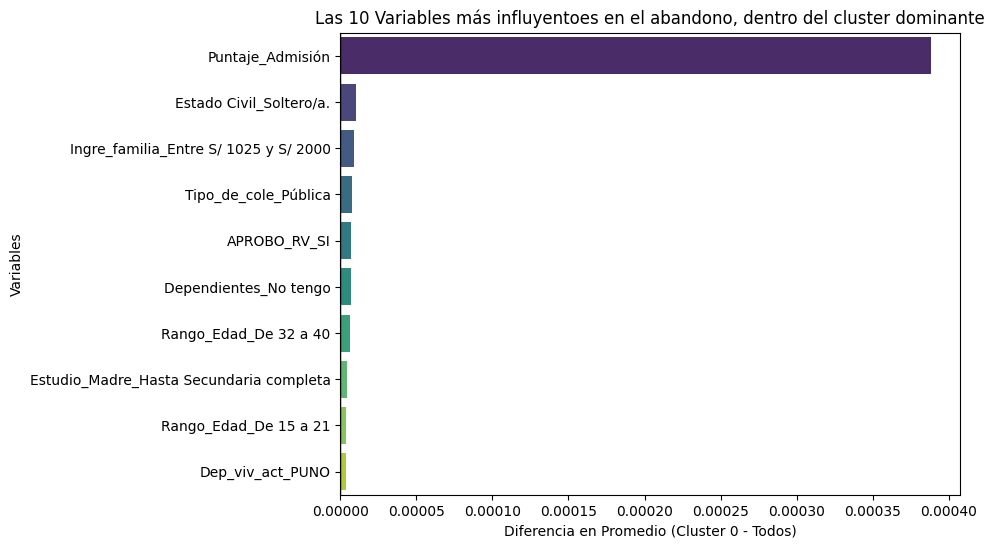

In [ ]:
top_10_features = mean_diff.head(10)
plt.figure(figsize=(8, 6))
#plt.xlim(0.0, 0.35)  # Set x-axis range
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="viridis")
plt.axvline(0, color="black", linewidth=1)  # Línea en cero para referencia
plt.xlabel("Diferencia en Promedio (Cluster 0 - Todos)")
plt.ylabel("Variables")
plt.title("Las 10 Variables más influyentoes en el abandono, dentro del cluster dominante")
plt.show()

<ipython-input-36-c23ea8067d9e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_features.values, y=bottom_10_features.index, palette="viridis")


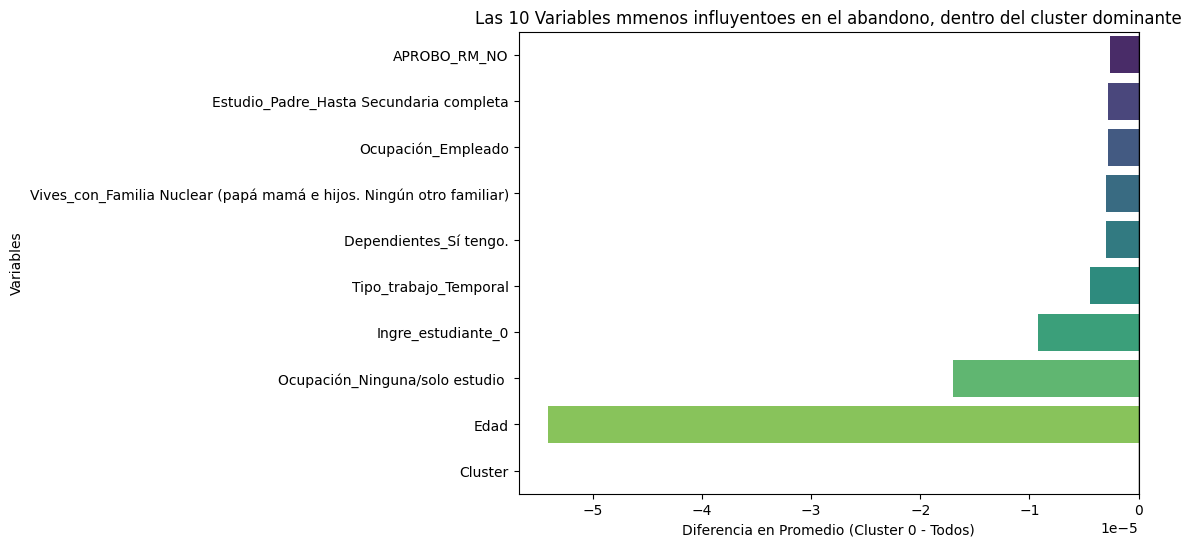

In [ ]:
bottom_10_features = mean_diff.tail(10)
plt.figure(figsize=(8, 6))
#plt.xlim(-0.35, 0.0)  # Set x-axis range
sns.barplot(x=bottom_10_features.values, y=bottom_10_features.index, palette="viridis")
plt.axvline(0, color="black", linewidth=1)  # Línea en cero para referencia
plt.xlabel("Diferencia en Promedio (Cluster 0 - Todos)")
plt.ylabel("Variables")
plt.title("Las 10 Variables mmenos influyentoes en el abandono, dentro del cluster dominante")
plt.show()